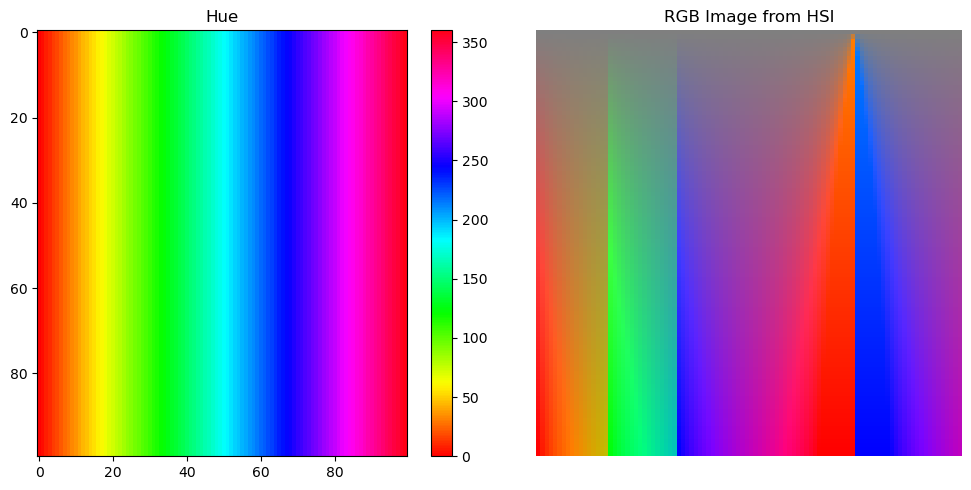

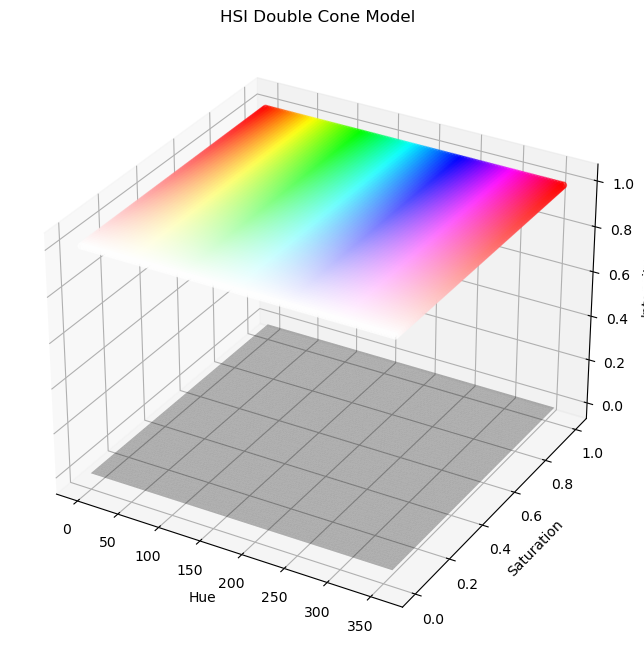

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hsi_to_rgb(h, s, i):
    """
    将HSI颜色表示转换为RGB颜色表示
    """
    h = h / 360.0  # 将色调转换为[0, 1]范围
    c = i * s  # 色度
    x = c * (1 - np.abs((h * 6) % 2 - 1))
    
    r, g, b = 0, 0, 0
    
    if 0 <= h < 1/6:
        r, g, b = c, x, 0
    elif 1/6 <= h < 2/6:
        r, g, b = x, c, 0
    elif 2/6 <= h < 3/6:
        r, g, b = 0, c, x
    elif 3/6 <= h < 4/6:
        r, g, b = 0, x, c
    elif 4/6 <= h < 5/6:
        r, g, b = x, 0, c
    elif 5/6 <= h <= 1:
        r, g, b = c, 0, x
    
    m = i - c  # 亮度修正
    r, g, b = r + m, g + m, b + m
    
    return np.clip(np.array([r, g, b]), 0, 1)

# 生成HSI颜色数据
h = np.linspace(0, 360, 100)
s = np.linspace(0, 1, 100)
h, s = np.meshgrid(h, s)

# 计算对应的RGB颜色
rgb_colors = np.array([hsi_to_rgb(h_, s_, 1) for h_, s_ in zip(h.flatten(), s.flatten())])

# 将数据重塑为二维数组
h = h.flatten()
s = s.flatten()

# 创建三维坐标
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制HSI颜色空间的双锥模型
ax.scatter(h, s, 1, c=rgb_colors, marker='o', alpha=0.6)

# 绘制低亮度锥体
ax.plot_trisurf(h, s, np.zeros_like(h), color='black', alpha=0.3, linewidth=0)

ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Intensity')
ax.set_title('HSI Double Cone Model')

plt.show()

In [5]:
import numpy as np
from mayavi import mlab

# 生成HSI颜色数据
h = np.linspace(0, 360, 100)
s = np.linspace(0, 1, 100)
h, s = np.meshgrid(h, s)

# 计算对应的RGB颜色
rgb_colors = np.array([hsi_to_rgb(h_, s_, 1) for h_, s_ in zip(h.flatten(), s.flatten())])

# 将数据重塑为二维数组
h = h.flatten()
s = s.flatten()

# 创建3D场景
fig = mlab.figure(size=(800, 600))

# 绘制HSI颜色空间的双锥模型
mlab.points3d(h, s, np.ones_like(h), color=rgb_colors)

# 显示图形
mlab.show()

ModuleNotFoundError: No module named 'mayavi'